In [70]:
import json
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os


ANNOTATION_PATH = "../../data/coco2017/annotations/instances_val2017.json"
SAVE_PATH = "../../data/coco/captions/en/processed_captions_val2017.csv"

with open(ANNOTATION_PATH) as f:
    data = json.load(f)

In [71]:
list(data.keys())

['info', 'licenses', 'images', 'annotations', 'categories']

In [74]:
data["annotations"]

[{'segmentation': [[510.66,
    423.01,
    511.72,
    420.03,
    510.45,
    416.0,
    510.34,
    413.02,
    510.77,
    410.26,
    510.77,
    407.5,
    510.34,
    405.16,
    511.51,
    402.83,
    511.41,
    400.49,
    510.24,
    398.16,
    509.39,
    397.31,
    504.61,
    399.22,
    502.17,
    399.64,
    500.89,
    401.66,
    500.47,
    402.08,
    499.09,
    401.87,
    495.79,
    401.98,
    490.59,
    401.77,
    488.79,
    401.77,
    485.39,
    398.58,
    483.9,
    397.31,
    481.56,
    396.35,
    478.48,
    395.93,
    476.68,
    396.03,
    475.4,
    396.77,
    473.92,
    398.79,
    473.28,
    399.96,
    473.49,
    401.87,
    474.56,
    403.47,
    473.07,
    405.59,
    473.39,
    407.71,
    476.68,
    409.41,
    479.23,
    409.73,
    481.56,
    410.69,
    480.4,
    411.85,
    481.35,
    414.93,
    479.86,
    418.65,
    477.32,
    420.03,
    476.04,
    422.58,
    479.02,
    422.58,
    480.29,
    423.01,
    4

In [64]:
category_to_name = {} # Mapping from category to name

for category in data["categories"]:
    category_to_name[category['id']] = category['name']

In [65]:
image_info = {}

for box in data["annotations"]:
    if box['image_id'] not in image_info:
        image_info[box['image_id']] = [category_to_name[box['category_id']]]
    else:
        image_info[box['image_id']].append(category_to_name[box['category_id']])
        
for image_id in image_info:
    image_info[image_id] = list(set(image_info[image_id]))
        

In [66]:
image_info

{289343: ['bicycle', 'dog', 'person', 'bench'],
 61471: ['toilet', 'dog', 'bottle'],
 472375: ['dog', 'motorcycle', 'cup'],
 520301: ['dog'],
 579321: ['dog', 'person'],
 494869: ['person', 'spoon', 'bowl', 'bottle', 'dog'],
 554002: ['dog', 'person', 'handbag', 'chair'],
 78823: ['dog', 'car', 'potted plant'],
 419974: ['person',
  'potted plant',
  'oven',
  'bottle',
  'fork',
  'cup',
  'wine glass',
  'knife',
  'bench',
  'chair',
  'dog',
  'dining table'],
 404484: ['person', 'potted plant', 'tv', 'teddy bear', 'dog'],
 329219: ['person', 'spoon', 'fork', 'cup', 'knife', 'dog', 'sink'],
 68078: ['toilet', 'dog', 'bottle', 'sink'],
 170893: ['toilet', 'dog'],
 65485: ['dog', 'car'],
 498286: ['dog', 'car', 'truck'],
 424162: ['person', 'bicycle', 'car', 'truck', 'dog', 'backpack'],
 61108: ['bicycle', 'dog', 'car', 'bench'],
 67213: ['person', 'dog', 'car'],
 365207: ['dog', 'car', 'bench'],
 131273: ['dog'],
 279278: ['person', 'bicycle', 'cup', 'handbag', 'dog', 'skateboard'],

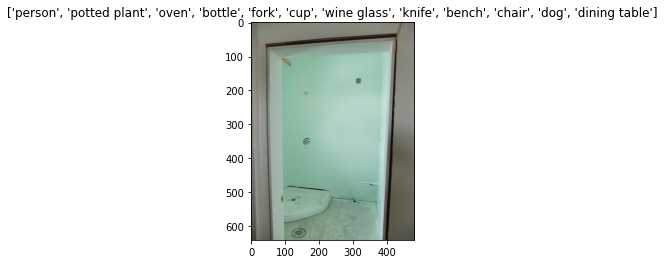

In [69]:
import skimage
test_image_path = "../../data/coco2017/images/val2017/000000382734.jpg"
image = skimage.io.imread(test_image_path)
plt.imshow(image)
plt.title(image_info[419974])
plt.show()

In [37]:
os.mkdir("../../dicts/texts/coco/")

In [39]:
with open("../../dicts/texts/coco/coco_labels.txt", "w") as f:
    for category in data["categories"]:
        f.write(category["name"] + "\n")
        
